In [20]:
import numpy as np
import pandas as pd
df=pd.read_csv(r"C:\Users\lucius seneca\CampusX\100 Days Of ML\DAY 21 OUTLIER DETECTION\Winsorization\weight-height.csv")
import seaborn as sns


In [21]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [22]:
df.shape

(10000, 3)

<Axes: >

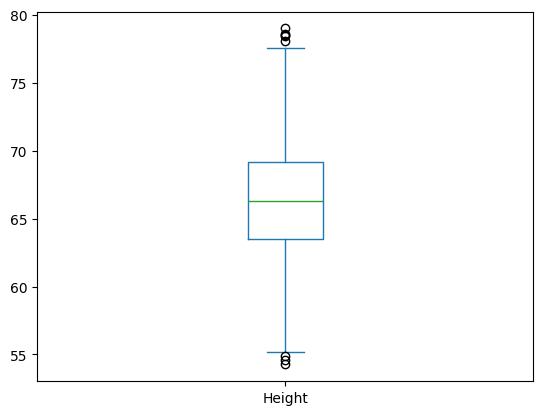

In [23]:
df["Height"].plot(kind="box")

<Axes: ylabel='Density'>

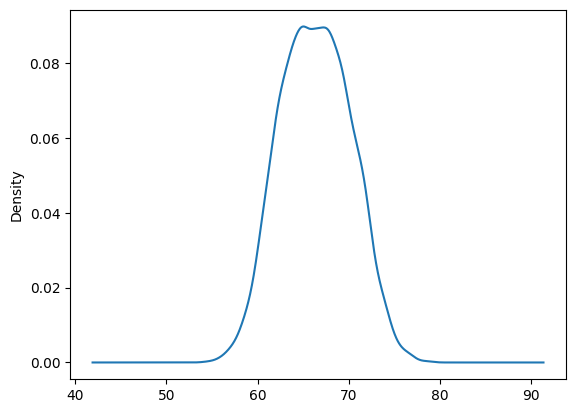

In [24]:
df["Height"].plot(kind="kde")

In [25]:
upper_limit=df["Height"].quantile(0.99)

In [26]:
upper_limit

74.7857900583366

In [27]:
lower_limit=df["Height"].quantile(0.01)

In [28]:
lower_limit

58.13441158671655

In [29]:
df[(df["Height"]>=upper_limit) | (df["Height"]<=lower_limit)]

,Gender,Height,Weight
23,Male,75.205974,228.761781
190,Male,76.709835,235.035419
197,Male,75.944460,231.924749
202,Male,75.140821,224.124271
215,Male,74.795375,232.635403
...,...,...,...
9761,Female,56.975279,90.341784
9825,Female,55.979198,85.417534
9895,Female,57.740192,93.652957
9904,Female,57.028857,101.202551


In [30]:
new_df=df[(df["Height"]<=upper_limit) & (df["Height"]>=lower_limit)]

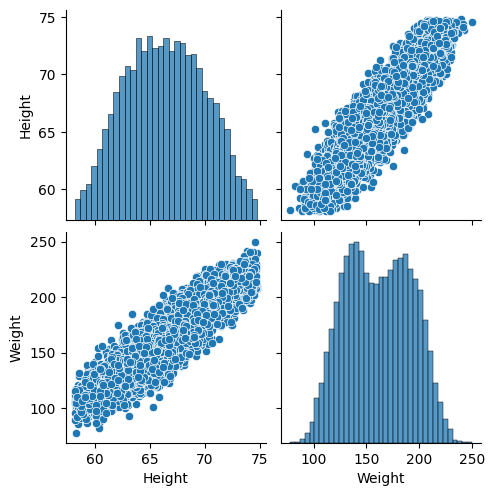

In [31]:
import seaborn as sns
sns.pairplot(new_df)

In [32]:
new_df.describe()

,Height,Weight
count,9800.000000,9800.000000
mean,66.364366,161.399489
std,3.645075,30.933549
min,58.134496,77.523774
25%,63.577162,136.322717
50%,66.318070,161.212928
75%,69.119896,186.753317
max,74.785714,249.946283


<Axes: xlabel='Height', ylabel='Count'>

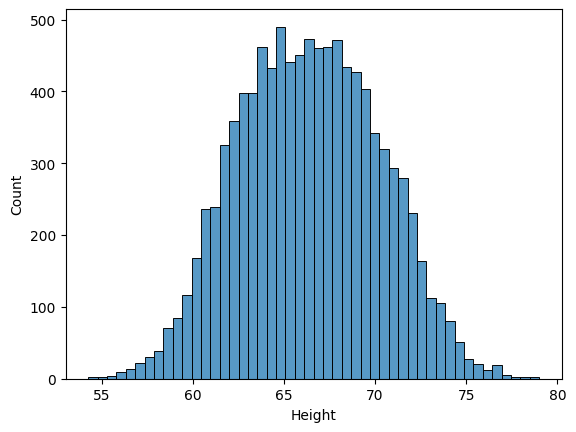

In [33]:
sns.histplot(df["Height"])

<Axes: ylabel='Height'>

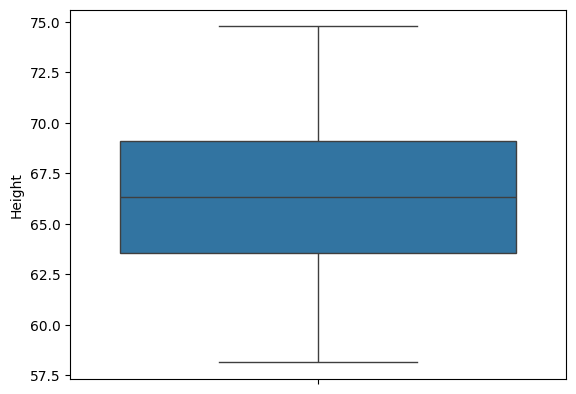

In [34]:
sns.boxplot(new_df["Height"])

In [35]:
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


## Capping

In [38]:
df["Height"]=np.where(df["Height"]>=upper_limit,
         upper_limit,
         np.where(
             df["Height"]<=lower_limit,
             lower_limit,
             df["Height"]
         ))

In [40]:
df["Height"].describe()

count    10000.000000
mean        66.366281
std          3.795717
min         58.134412
25%         63.505620
50%         66.318070
75%         69.174262
max         74.785790
Name: Height, dtype: float64

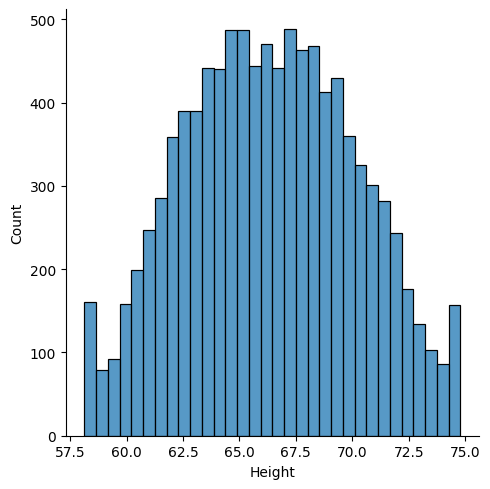

In [41]:
sns.displot(df["Height"])

<Axes: ylabel='Height'>

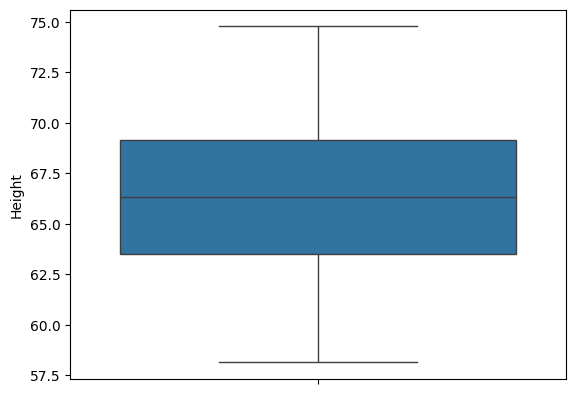

In [42]:
sns.boxplot(df["Height"])